In [4]:
# GIVEN PARAMS

averages = {
    2022:140,
    2023:135,
    2024:160
}

In [85]:
import matplotlib.pyplot as plt

In [86]:
plt.style.use('dark_background')

In [108]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as plt
import pandas as pd
from datetime import datetime, timedelta
from datapipeline import DataFeed
from datapipelineAWS import DataFeed as DataF
from dateutil.relativedelta import relativedelta
from datetime import timedelta, datetime

%matplotlib inline

In [109]:
current_month = datetime.now().month
current_year = datetime.now().year

In [110]:
self = DataFeed()

In [111]:
df = self.get_food_price_index
ser = df['Food Price Index']

In [112]:
# cleanup for dummy forecasts added to the real data
ser = ser[:-5]

In [114]:
seasonal = DataF().get_seasonality(ser,frequency_type='m')

In [115]:
seasonal

{1: 0.41134655049888985,
 2: 0.8480161224970932,
 3: 3.3452983943318477,
 4: 2.0956002897486163,
 5: 1.9889957092852701,
 6: -0.10832352344323615,
 7: -4.3017294260398655,
 8: -0.9741571538000056,
 9: -1.4775785707165492,
 10: -0.9313321811428561,
 11: -0.13003194835890602,
 12: -0.7661042628602994}

In [107]:
def yearly_average_interpolator(ser, seasonal:dict,averages):
    """
    ser: timeseries data (1D timeseries)
    
    seasonal dict : 
    {1: 0.41134655049888985,
     2: 0.8480161224970932,
     3: 3.3452983943318477,
     4: 2.0956002897486163,
     5: 1.9889957092852701,
     6: -0.10832352344323615,
     7: -4.3017294260398655,
     8: -0.9741571538000056,
     9: -1.4775785707165492,
     10: -0.9313321811428561,
     11: -0.13003194835890602,
     12: -0.7661042628602994}
     
    averages = {
        2022:140,
        2023:135,
        2024:160
    }
    """
    
    years = list(averages.keys())
    years.sort()

    for year in years:
        # DEPARTURE POINT
        last = ser.index[-1]
        last_month = last.month if last.month <12 else 0
        last_price = ser[-1]
        # year = last.year
        interpolate = []
        prices = [] # DATE , PRICE

        for i in range(last_month+1,13):
            price = last_price+seasonal[i]
            prices.append(price)
            interpolate.append([datetime(year,i,1),price])
            last_price = price


        if max(ser.index).year>=year:
            A = sum(ser.loc[f'{year}'])
        else:
            A = 0

        c = (12*averages[year] - A)/(sum(prices))

        new_prices = [i*c for i in prices]

        # SANITY CHECK 
        # (sum(new_prices)+sum(ser.loc[f'{year}']))/12

        interpolate = [[interpolate[i][0],new_prices[i]] for i in range(len(interpolate))]

        # interpolate

        ser = ser.append(pd.DataFrame(interpolate,columns =['Date','Prices']).set_index("Date")['Prices'])

    return ser

<AxesSubplot:xlabel='Date'>

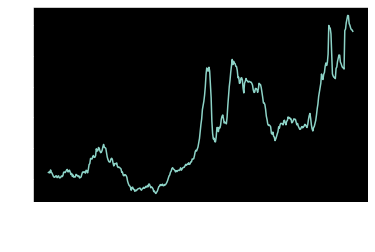

In [118]:
yearly_average_interpolator(ser,seasonal,averages).plot()